# **Exploração e análise de dados de crédito com SQL**
A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **1. Objetivo**
Este projeto tem como objetivo realizar uma análise exploratória de dados utilizando a base de dados de cartões de crédito de clientes de um banco, fornecida pelo professor André Perez durante a aula. A análise será conduzida utilizando SQL no ambiente da AWS, com o S3 para armazenamento dos dados e o Athena para execução das consultas SQL. Além disso, o Python será utilizado para realizar o tratamento dos dados (data wrangling) e a criação de gráficos que facilitem a visualização dos resultados. Cada análise apresentada será acompanhada do respectivo código SQL que gerou a consulta.

# **2. Tratamento dos Dados**
Nesta etapa, utilizarei o python para escolher as colunas que irei usar na analise.

In [1]:
import pandas as pd  # Importando a biblioteca pandas para organizar os dados em uma tabela (DataFrame)
import seaborn as sns  # Importando a biblioteca Seaborn para criação de gráficos estatísticos e visualizações
import matplotlib.pyplot as plt  # Importando a biblioteca Matplotlib para personalização dos gráficos


In [2]:
#Importando a base de dados
df = pd.read_csv('/kaggle/input/credito-completo/credito-completo.csv') 

In [3]:
#Excluindo as colunas que não iremos usar
df=df.drop(columns=['id', 'default', 'meses_de_relacionamento'])

In [4]:
# Remover separadores de milhar e trocar vírgula por ponto
df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Remover separadores de milhar e trocar vírgula por ponto
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

In [5]:
df.head(3)

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20


In [6]:
#exportando resultado final para o formato csv sem o cabeçalho e index
df.to_csv("credito_tratado.csv", index=False, header=None)

## **3.Exploração dos Dados:**
Agora com os dados tratados vamos entender o que tem na nossa matéria prima.
Primeiro vamos ver o que representam as colunas : 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

Agora vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

Query: SELECT count(*) FROM credito
> Reposta: 10127 linhas



**Como são os dados** 

Query: SELECT * FROM credito LIMIT 10;
![Dez primeiras linhas do dataset](https://github.com/mateus4411/imagens-queries-sql/blob/main/como_est%C3%A3o_os_dados.PNG?raw=true)

> É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna! 

**Quais os tipos de cada dado**

**Query:** DESCRIBE credito

![Descrição dos tipos de dados](https://github.com/mateus4411/imagens-queries-sql/blob/main/tipos_dos_dados.PNG?raw=true)


Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query:** SELECT DISTINCT escolaridade FROM credito

![Tipos de escolaridade](https://github.com/mateus4411/imagens-queries-sql/blob/main/tipos_de_escolaridade.PNG?raw=true)

> Os dados contam com vários níveis de escolaridade e é possível perceber que temos valores nulos (na) no dataset.

Será que temos mais valores nulos?

**Quais são os tipos de estado_civil disponíveis no dataset?**

**Query:** SELECT DISTINCT estado_civil  FROM credito

![Tipos de estado civil](https://github.com/mateus4411/imagens-queries-sql/blob/main/tipos_estado_civil.PNG?raw=true)

> Novamente encontramos valores nulos nos dados de estado civil!

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query:** SELECT DISTINCT salario_anual  FROM credito

![Tipos de salario anual](https://github.com/mateus4411/imagens-queries-sql/blob/main/tipos_salario_anual.PNG?raw=true)

> Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos. 


**Quais são os tipos de cartão disponíveis no dataset?**

**Query:** SELECT DISTINCT tipo_cartao  FROM credito

![Tipos de cartão](https://github.com/mateus4411/imagens-queries-sql/blob/main/tipos_de_cartao.PNG?raw=true)

> Aqui vemos que não há valores nulos.



## **4.Analise dos Dados:**
Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. Vamos fazer perguntas:

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

**Query:** select count(*), sexo from credito group by sexo

![quantidade por sexo](https://github.com/mateus4411/imagens-queries-sql/blob/main/quantidade_por_sexo.PNG?raw=true)

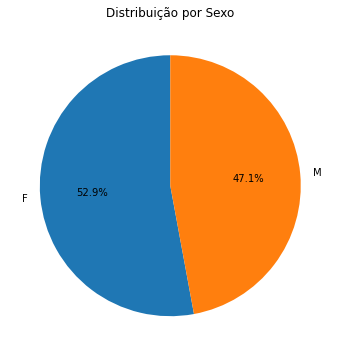

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contar a frequência de cada sexo
contagem_sexo = df['sexo'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.pie(contagem_sexo, labels=contagem_sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Sexo')
plt.show()

>Podemos ver que há mais clientes do sexo feminino do que masculino

 **Nesse banco de dados, quantos clientes temos de cada faixa salarial, e quantos deles são homens e mulheres?**
 
 **Query:**

```sql 
SELECT 
    salario_anual,
    COUNT(*) AS total,
    SUM(CASE WHEN sexo = 'M' THEN 1 ELSE 0 END) AS qtd_homens,
    SUM(CASE WHEN sexo = 'F' THEN 1 ELSE 0 END) AS qtd_mulheres
FROM credito
GROUP BY salario_anual;
```

![quantidade faixa salarial](https://github.com/mateus4411/imagens-queries-sql/blob/main/quantidade_faixa_salarial.PNG?raw=true)

>> Podemos ver que mulheres não recebem mais que $60k, logo os maiores salarios são de homens

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

**Query:** 

```sql
select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo
```
![media de idade por sexo](https://github.com/mateus4411/imagens-queries-sql/blob/main/media_de_idade.PNG?raw=true)

>>A média de idade dos clientes é de 46 anos , tantos para homens tanto para mulheres

**Quais as características dos clientes que possuem os maiores creditos?**

**Query:**

````sql
SELECT 
    MAX(limite_credito) AS limite_credito, 
    escolaridade, 
    tipo_cartao, 
    sexo, 
    estado_civil 
FROM 
    credito 
GROUP BY 
    escolaridade, tipo_cartao, sexo, estado_civil 
ORDER BY 
    limite_credito DESC 
LIMIT 15;
````
![caracteristicas dos clientes](https://github.com/mateus4411/imagens-queries-sql/blob/main/caracteristicas.PNG?raw=true)

Podemos ver que a maioria são homens

**Quais as características dos clientes que possuem os menores creditos?**

**Query**:

````sql
SELECT 
    MAX(limite_credito) AS limite_credito, 
    escolaridade, 
    tipo_cartao, 
    sexo, 
    estado_civil 
FROM 
    credito 
WHERE 
    escolaridade != 'na' 
    AND tipo_cartao != 'na' 
GROUP BY 
    escolaridade, tipo_cartao, sexo, estado_civil 
ORDER BY 
    limite_credito ASC
LIMIT 15;
````

![caracteristicas menores creditos](https://github.com/mateus4411/imagens-queries-sql/blob/main/caracteristicas_menos.PNG?raw=true)

>> Podemos ver que os que menos tem limite são mulheres , com nenhum homem entre os clientes que tem menos limite

**Será que as mulheres gastam mais?**

**Query:**

````sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo
````
![gasto de homens e mulheres](https://github.com/mateus4411/imagens-queries-sql/blob/main/gasto_de_homens_e_mulheres.PNG?raw=true)

>> Não , os homens gastam mais em média

**Quem gasta mais ? solteiros, casados ou divorciados ?**
**Query:**

````sql

SELECT 
    MAX(valor_transacoes_12m) AS maior_valor_gasto, 
    AVG(valor_transacoes_12m) AS media_valor_gasto, 
    MIN(valor_transacoes_12m) AS min_valor_gasto, 
    estado_civil, 
FROM 
    credito 
GROUP BY 
    estado_civil;
````
![quem gasta mais?](https://github.com/mateus4411/imagens-queries-sql/blob/main/quem_gasta_mais_estado_civil.PNG?raw=true)

>>Solteiros gastam mais , enquanto casados gasta bem menos em média , ja os divorciados gastam quase tanto quanto solteiros

**Qual nivel de escolaridade dos que mais gastam ?**

**Query:**
`````sql
SELECT 
    MAX(valor_transacoes_12m) AS maior_valor_gasto, 
    AVG(valor_transacoes_12m) AS media_valor_gasto, 
    MIN(valor_transacoes_12m) AS min_valor_gasto, 
    escolaridade 
FROM 
    credito 
WHERE 
    escolaridade != 'na'  -- Para garantir que estamos considerando apenas valores válidos
GROUP BY 
    escolaridade;

`````
![escolaridade de quem gasta mais](https://github.com/mateus4411/imagens-queries-sql/blob/main/nivel_escolaridade_quem_gasta_+.PNG?raw=true)

>> Aqueles sem educação formal são os que mais gastam

**Vamos analisar agora a idade por tipo de cartão:**

**Query:**
```sql
SELECT 
    tipo_cartao,
    AVG(idade) AS media_idade, 
    MIN(idade) AS min_idade, 
    MAX(idade) AS max_idade
FROM 
    credito
GROUP BY
    tipo_cartao;
```
![](https://github.com/mateus4411/imagens-queries-sql/blob/main/idade_por_cartao.PNG?raw=true)

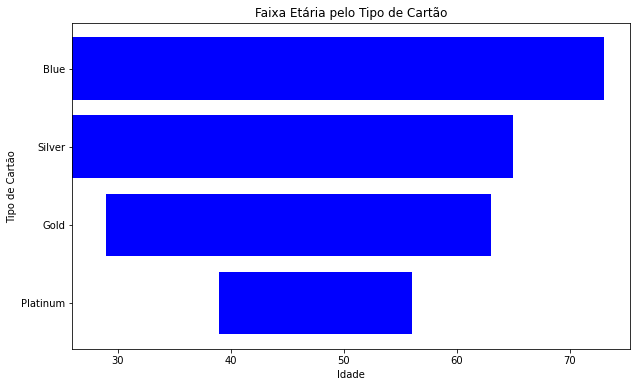

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Dados do dicionário
dict_faixa_etaria = {
    'tipo_cartao': ['Platinum', 'Gold', 'Silver', 'Blue'],
    'limite_minimo': [39, 29, 26, 26],
    'limite_maximo': [56, 63, 65, 73]
}

# Criar os valores para as barras
tipos_cartao = dict_faixa_etaria['tipo_cartao']
limites_minimo = dict_faixa_etaria['limite_minimo']
limites_maximo = dict_faixa_etaria['limite_maximo']

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as barras de intervalo
for i in range(len(tipos_cartao)):
    ax.barh(tipos_cartao[i], limites_maximo[i] - limites_minimo[i], left=limites_minimo[i], color='blue')

# Títulos e labels
ax.set_title('Faixa Etária pelo Tipo de Cartão')
ax.set_xlabel('Idade')
ax.set_ylabel('Tipo de Cartão')

# Exibir gráfico
plt.show()


>>Vemos que os melhores cartões estão com aqueles com mais idade , talvez por terem mais tempo trabalhado